<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Project Title: Arabic Sentiment Reviews</p></b></h1>

### Tabel of Contents:

* [Import Libraries](#1)
* [Load Dataset](#2)
* [Preprocessing](#3)
* [Sequences Model](#4)
* [Evaluation](#5)
* [SentimentIntensityAnalyzer](#7)
* [Like this? Upvote and comment! 🌊 End](#6)

**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Import Libraries</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
from tqdm import tqdm
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,Embedding,SpatialDropout1D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


**<a id="2"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Load Dataset</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
dataset = pd.read_csv('/kaggle/input/chatgpt-user-reviews/CHATGPT.csv')
dataset.head()

,Review,label
0,up to this point i ’ ve mostly been using chat...,NEGATIVE
1,i ’ ve been a user since it ’ s initial roll o...,NEGATIVE
2,this app would almost be perfect if it wasn ’ ...,NEGATIVE
3,"i recently downloaded the app and overall, it'...",POSITIVE
4,i appreciate the devs implementing siri suppor...,NEGATIVE


In [3]:
dataset.shape

(2292, 2)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2249 non-null   object
 1   label   2292 non-null   object
dtypes: object(2)
memory usage: 35.9+ KB


In [5]:
dataset.isna().sum()

Review    43
label      0
dtype: int64

In [6]:
dataset.dropna(inplace=True)

In [7]:
dataset.label.value_counts()

label
NEGATIVE    1263
POSITIVE     986
Name: count, dtype: int64

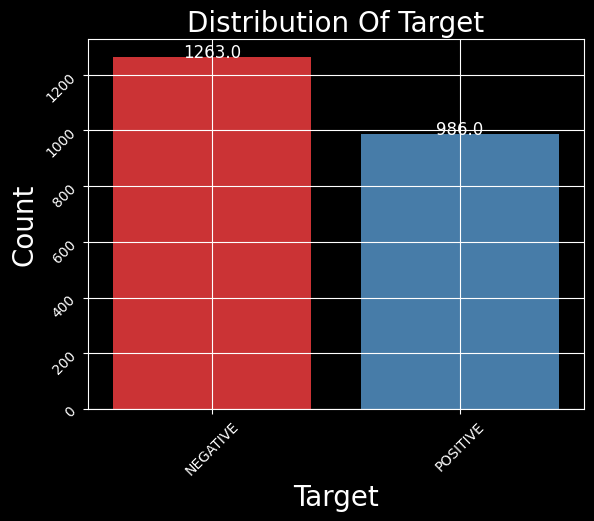

In [8]:
plt.style.use('dark_background')
ax = sns.countplot(x='label', data=dataset, palette='Set1')
plt.title('Distribution Of Target', fontsize=20)
plt.xlabel('Target', fontsize=20)
plt.ylabel('Count', fontsize=20)
#ax.set_xticklabels(['Negative','Positive'])
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12)
plt.show()

**<a id="3"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Preprocessing</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [9]:
def clean_text(text):
    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert multiple whitespace characters to a single space
    text = re.sub(r'\s+', ' ', text)
    # Convert the text to lowercase
    text = text.lower()
    return text

In [10]:
dataset.label[50],dataset.Review[50]

('POSITIVE',
 'i ’ m pleased with my mobile chatgpt experience so far. it feels even more conversational and almost like a messages chat. i also like that you can search through all your previous chats. and using whisper to prompt gpt already feels like one half of a supercharged siri / alexa experience. however, i ’ d love to be able to enable beta features as a plus user. as far as i can tell from exploring the app, there isn ’ t a direct way to enable browsing or plugins yet. i have been able to start a chat with browser / plugins on web and then continue in app with the same capabilities. anyways, i know we ’ re only a day in. excited to see all the possible new ways to interface with agents!')

In [11]:
dataset.label[50],clean_text(dataset.Review[50])

('POSITIVE',
 'i m pleased with my mobile chatgpt experience so far it feels even more conversational and almost like a messages chat i also like that you can search through all your previous chats and using whisper to prompt gpt already feels like one half of a supercharged siri alexa experience however i d love to be able to enable beta features as a plus user as far as i can tell from exploring the app there isn t a direct way to enable browsing or plugins yet i have been able to start a chat with browser plugins on web and then continue in app with the same capabilities anyways i know we re only a day in excited to see all the possible new ways to interface with agents')

In [12]:
dataset.Review = dataset.Review.apply(clean_text)
dataset.head()

,Review,label
0,up to this point i ve mostly been using chatgp...,NEGATIVE
1,i ve been a user since it s initial roll out a...,NEGATIVE
2,this app would almost be perfect if it wasn t ...,NEGATIVE
3,i recently downloaded the app and overall its ...,POSITIVE
4,i appreciate the devs implementing siri suppor...,NEGATIVE


In [13]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(dataset.Review)

In [14]:
encoder = LabelEncoder()
dataset.label = encoder.fit_transform(dataset.label)
dataset.head()

,Review,label
0,up to this point i ve mostly been using chatgp...,0
1,i ve been a user since it s initial roll out a...,0
2,this app would almost be perfect if it wasn t ...,0
3,i recently downloaded the app and overall its ...,1
4,i appreciate the devs implementing siri suppor...,0


In [15]:
### Split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, dataset.label, test_size=0.2, random_state=44, shuffle =True,stratify=dataset.label)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1799, 6113)
X_test shape is  (450, 6113)
y_train shape is  (1799,)
y_test shape is  (450,)


In [16]:
X_train_dense = X_train.toarray().reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_dense = X_test.toarray().reshape(X_test.shape[0], 1, X_test.shape[1])

**<a id="4"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Sequences Model</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [17]:
model = Sequential()
model.add(LSTM(units=25, return_sequences=True, input_shape=(1, X_train.shape[1])))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=25, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 25)          │       613,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 25)          │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 25)             │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 624,126 (2.38 MB)

 Trainable params: 624,126 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
checkpoint_cb = ModelCheckpoint("model.keras", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with EarlyStopping
history = model.fit(
    X_train_dense, y_train,
    epochs=50,
    validation_split=0.1,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5054 - loss: 0.6924 - val_accuracy: 0.5444 - val_loss: 0.6886
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5484 - loss: 0.6832 - val_accuracy: 0.5444 - val_loss: 0.6460
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6036 - loss: 0.5907 - val_accuracy: 0.7889 - val_loss: 0.4925
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8620 - loss: 0.3886 - val_accuracy: 0.8667 - val_loss: 0.3962
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9384 - loss: 0.2435 - val_accuracy: 0.8722 - val_loss: 0.3563
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9577 - loss: 0.1492 - val_accuracy: 0.8667 - val_loss: 0.3534
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9735 - loss: 0.0907 - val_accuracy: 0.8778 - val_loss: 0.3450
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9854 - loss: 0.0701 - val_accuracy: 0.8667 - val_los

In [19]:
history_dict = history.history
pd.DataFrame(history_dict)

,accuracy,loss,val_accuracy,val_loss
0,0.551575,0.690957,0.544444,0.688568
1,0.563311,0.673413,0.544444,0.645991
2,0.647931,0.561338,0.788889,0.492533
3,0.867820,0.365171,0.866667,0.396219
4,0.937616,0.230496,0.872222,0.356257
5,0.955528,0.148289,0.866667,0.353407
6,0.973440,0.092790,0.877778,0.344978
7,0.986411,0.064209,0.866667,0.361281
8,0.988264,0.045436,0.872222,0.382502
9,0.993823,0.032867,0.872222,0.398360


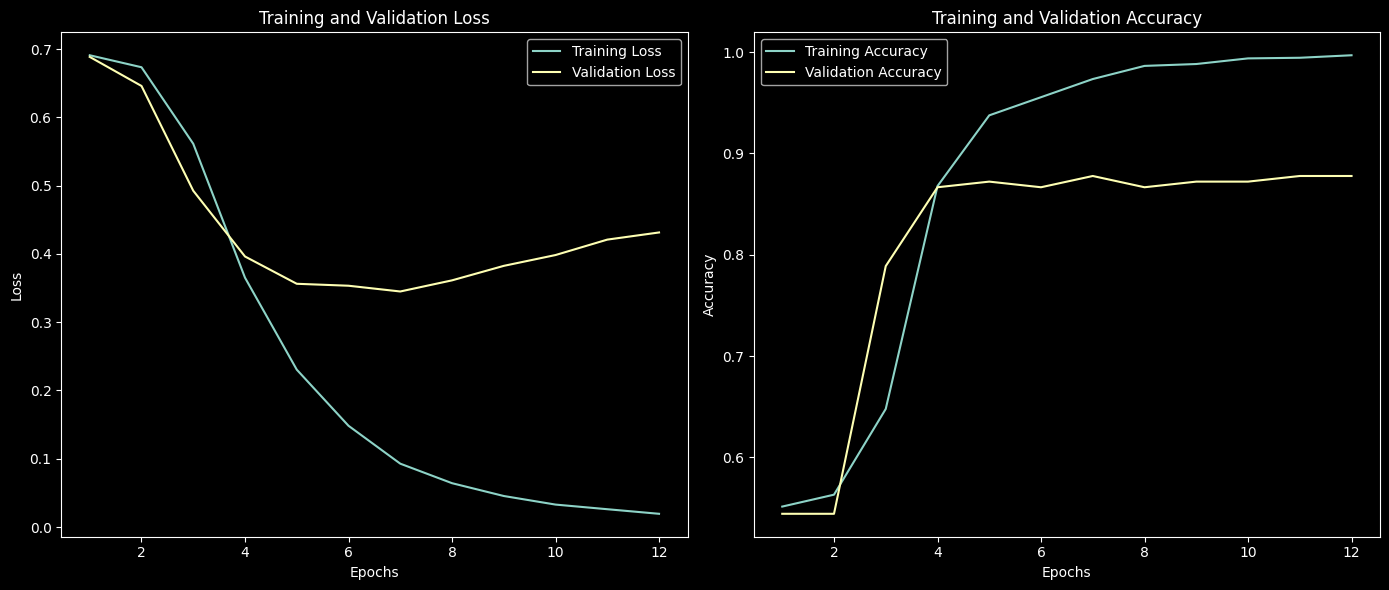

In [20]:
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x=epochs, y=loss, label='Training Loss')
sns.lineplot(x=epochs, y=val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
sns.lineplot(x=epochs, y=accuracy, label='Training Accuracy')
sns.lineplot(x=epochs, y=val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

**<a id="5"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Evaluation</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [21]:
loss,accuracy = model.evaluate(X_test_dense, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8676 - loss: 0.4023
Loss: 0.43787240982055664
Accuracy: 0.855555534362793


In [22]:
prediction=model.predict(X_test_dense)
y_pred=np.where(prediction>=.5,1,0)
df=pd.DataFrame()
df['actual'],df['pred']=y_test,y_pred
df

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


,actual,pred
602,1,0
1276,1,1
294,0,0
75,1,1
458,0,0
...,...,...
1827,0,0
1519,0,0
1500,1,1
1547,0,0


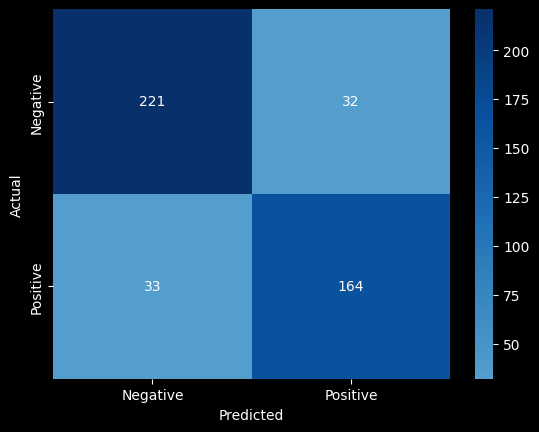

array([[221,  32],
       [ 33, 164]])

In [23]:
CM = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
CM

In [24]:
ClassificationReport = classification_report(y_test, y_pred, target_names=labels)
print('Classification Report is : ', ClassificationReport) 

Classification Report is :                precision    recall  f1-score   support

    Negative       0.87      0.87      0.87       253
    Positive       0.84      0.83      0.83       197

    accuracy                           0.86       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.86      0.86      0.86       450



**<a id="7"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">SentimentIntensityAnalyzer</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [25]:
data = dataset.copy()
sen = SentimentIntensityAnalyzer()
data['score'] = data['Review'].apply(lambda text: sen.polarity_scores(text)['compound'])
data['sentiment'] = data['score'].apply(lambda x: 1 if x >= 0.5 else 0)
data.head()

,Review,label,score,sentiment
0,up to this point i ve mostly been using chatgp...,0,0.9962,1
1,i ve been a user since it s initial roll out a...,0,0.9915,1
2,this app would almost be perfect if it wasn t ...,0,0.9617,1
3,i recently downloaded the app and overall its ...,1,0.9921,1
4,i appreciate the devs implementing siri suppor...,0,0.9208,1


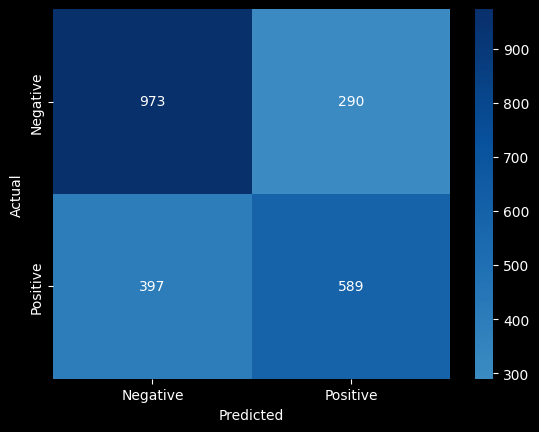

array([[973, 290],
       [397, 589]])

In [26]:
CM = confusion_matrix(data.label, data.sentiment)
labels = ['Negative', 'Positive']
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
CM

In [27]:
ClassificationReport = classification_report(data.label, data.sentiment, target_names=labels)
print('Classification Report is : ', ClassificationReport) 

Classification Report is :                precision    recall  f1-score   support

    Negative       0.71      0.77      0.74      1263
    Positive       0.67      0.60      0.63       986

    accuracy                           0.69      2249
   macro avg       0.69      0.68      0.69      2249
weighted avg       0.69      0.69      0.69      2249



**<a id="6"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Like this? Upvote and comment! 🌊 End</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>